In [1]:
import pandas as pd
data = pd.read_csv('FremontBridge12-18.csv', index_col='Date', parse_dates=True)

In [2]:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)

In [3]:
data['Total'] = data['West'] + data['East']
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # plot styling
seaborn.set_context(font_scale=1.5)
import numpy as np

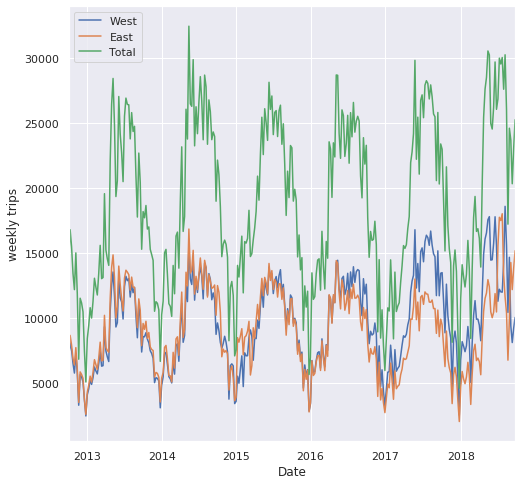

In [5]:
data.resample('W').sum().plot(figsize=(8, 8))
plt.ylabel('weekly trips');

In [6]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour)

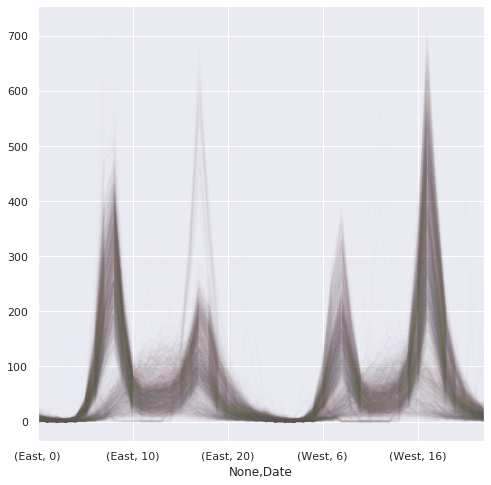

In [7]:
west = pivoted.iloc[:, :48]
west.T.plot(legend=False, alpha=0.01, figsize=(8, 8))

In [8]:
X = pivoted.values
X.shape

(2189, 48)

In [9]:
from sklearn.decomposition import PCA

#Xpca = PCA(n_components=2).fit_transform(X)
Xpca = PCA(0.90, svd_solver='full').fit_transform(X)

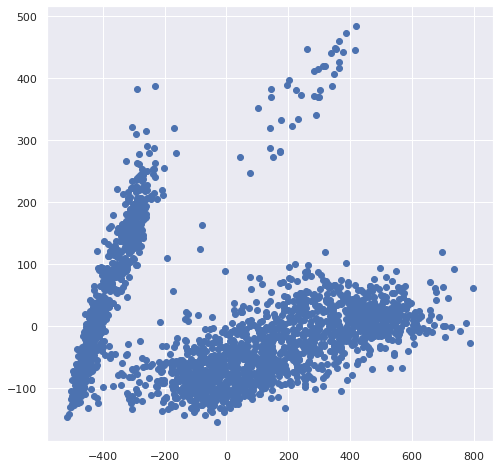

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:,0], Xpca[:, 1])

In [11]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(Xpca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
cluster_label = gmm.predict(Xpca)

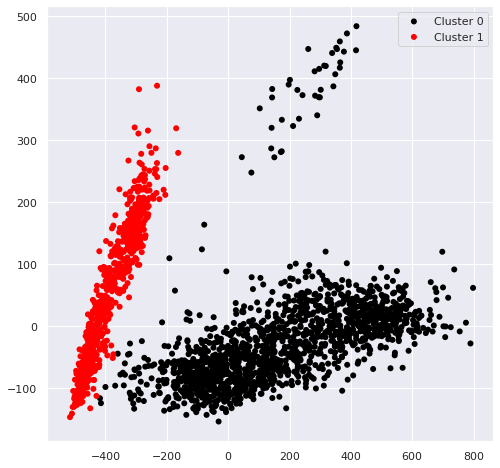

In [13]:
plt.figure(figsize=(8, 8))

for i, color in enumerate(['black', 'red']):
    inds = cluster_label == i
    x, y = Xpca[inds, 0], Xpca[inds, 1]
    plt.scatter(x, y, c=color, label="Cluster {}".format(i),
               edgecolors='none')

plt.legend()

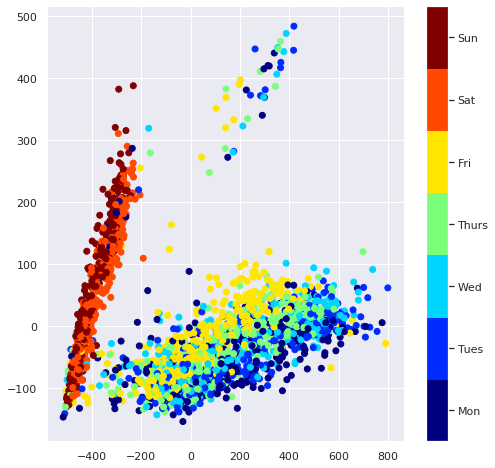

In [14]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek

plt.figure(figsize=(8, 8))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [21]:
#Xpca = PCA(n_components=3,svd_solver='full').fit_transform(X)

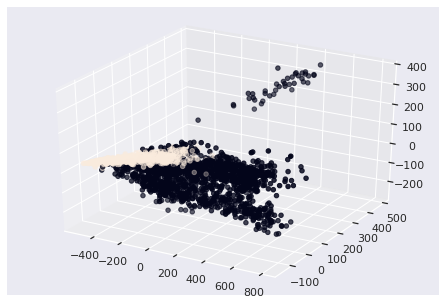

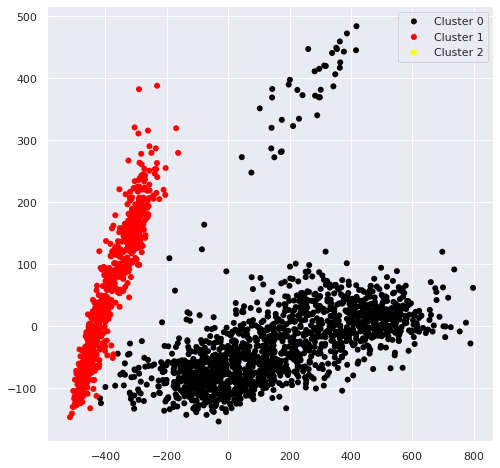

In [22]:
# plot in 3D 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=cluster_label)
pyplot.show()

# On to 2D plane

plt.figure(figsize=(8, 8))

for i, color in enumerate(['black', 'red', 'yellow']):
    inds = cluster_label == i
    x, y = Xpca[inds, 0], Xpca[inds, 1]
    plt.scatter(x, y, c=color, label="Cluster {}".format(i),
               edgecolors='none')

plt.legend()

The graphs do not change beyond 2 components